<a href="https://colab.research.google.com/github/hadilromdhane/Drug_Classification_Problem/blob/main/Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Upload your dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("drug200.csv")

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX



## **Exploratory Data Analysis**

In [ ]:
df.describe(include=='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
test = df.drop_duplicates()
len(df)-len(test)

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## **Feature Extraction** 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# **Age**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


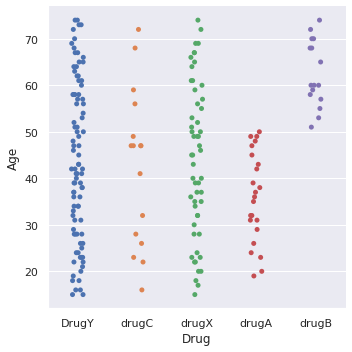

In [ ]:
sns.catplot('Drug','Age',data=df)

# *Sex*

In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

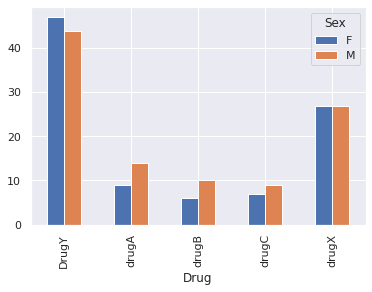

In [ ]:
sd_df = df.groupby('Sex').Drug.value_counts()
sd_df.unstack(level=0).plot(kind='bar')

# *Blood Pressure*

In [ ]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

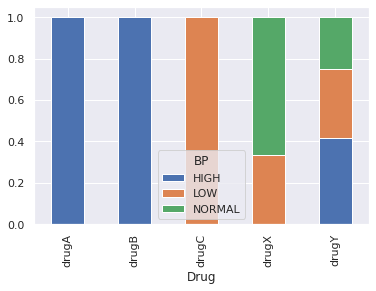

In [ ]:
tableau = pd.crosstab(df['Drug'],df['BP'])
tableau
tableau.div(tableau.sum(1).astype(float),axis=0).plot(kind='bar',stacked='False')

# *Cholesterol*

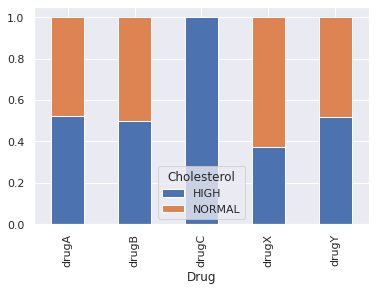

In [ ]:
tableau = pd.crosstab(df['Drug'],df['Cholesterol'])
tableau
tableau.div(tableau.sum(1).astype(float),axis=0).plot(kind='bar',stacked='False')

# *Na to K*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


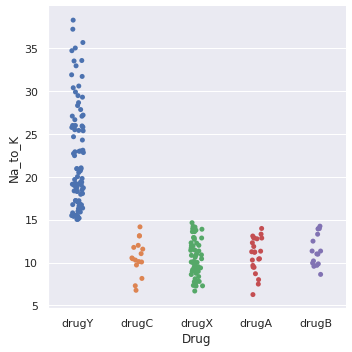

In [ ]:
sns.catplot('Drug','Na_to_K',data=df)

## **Categorical to numerical** 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def label_encoder(y):
  le = LabelEncoder()
  df[y]= le.fit_transform(df[y])
  print(df[y])


In [ ]:
features_list = ["BP","Cholesterol","Sex","Drug"]
for l in features_list:
  label_encoder(l)
  print(l)
  #Methode 2

0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64
BP
0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int64
Cholesterol
0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64
Sex
0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64
Drug


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
df["Sex"]= df["Sex"].map({0:12,1:120}) 
# Methode 1

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,12,0,0,25.355,0
1,47,120,1,0,13.093,3
2,47,120,1,0,10.114,3
3,28,12,2,0,7.798,4
4,61,12,1,0,18.043,0
...,...,...,...,...,...,...
195,56,12,1,0,11.567,3
196,16,120,1,0,12.006,3
197,52,120,2,0,9.894,4
198,23,120,2,1,14.020,4


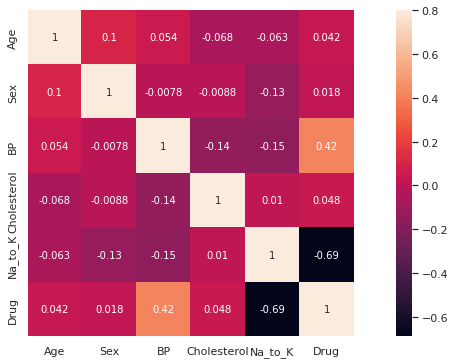

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),vmax=0.8,annot=True,square=True)

In [ ]:
df.drop('Sex',axis=1,inplace=True)

KeyError: ignored

In [ ]:
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,25.355,0
1,47,1,0,13.093,3
2,47,1,0,10.114,3
3,28,2,0,7.798,4
4,61,1,0,18.043,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug',axis=1)
Y = df.Drug

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(160, 5)

In [ ]:
Y_test.shape

(40,)




# **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=42)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
predicted_output = rfc.predict(X_test)

In [ ]:
predicted_output[0]

4

In [ ]:
Y_test

95     4
15     0
30     4
158    3
128    0
115    0
69     0
170    4
174    1
45     4
66     1
182    4
165    0
78     1
186    2
177    0
56     2
152    4
82     3
68     0
124    2
16     4
148    4
93     0
65     0
60     0
84     3
67     4
125    0
132    4
9      0
18     3
55     3
75     0
150    1
104    0
135    4
137    1
164    0
76     1
Name: Drug, dtype: int64

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy score : ", metrics.accuracy_score(Y_test, predicted_output))

Accuracy score :  1.0


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predicted_dtc = dtc.predict(X_test)

In [ ]:
print("Accuracy score : ", metrics.accuracy_score(Y_test, predicted_dtc))

Accuracy score :  1.0


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rfc.estimators_[9]
feature_list=["Age","Sex","BP","Cholesterol","Na_to_K"]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree&.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree&.dot')

# Write graph to a png file
graph.write_png('tree_10.png'); 

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicted_knn = knn.predict(X_test)

In [ ]:
print("Accuracy score : ", metrics.accuracy_score(Y_test, predicted_knn))

Accuracy score :  0.75


In [ ]:
predicted_knn[0]

1

In [ ]:
Y_test

95     4
15     0
30     4
158    3
128    0
115    0
69     0
170    4
174    1
45     4
66     1
182    4
165    0
78     1
186    2
177    0
56     2
152    4
82     3
68     0
124    2
16     4
148    4
93     0
65     0
60     0
84     3
67     4
125    0
132    4
9      0
18     3
55     3
75     0
150    1
104    0
135    4
137    1
164    0
76     1
Name: Drug, dtype: int64